In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Responder a pergunta:

## "Vamos investir 75k em marketing, qual deve ser o estoque enviado pra loja?"

# Importando a base de vendas

In [5]:
# Importando a base de vendas
base = pd.read_excel("Investimento_x_Venda.xlsx")

In [6]:
# Exibindo as 5 primeiras linhas
base.head()

,Investimento em marketing,Venda Qtd
0,20,118
1,25,142
2,40,225
3,52,260
4,67,295


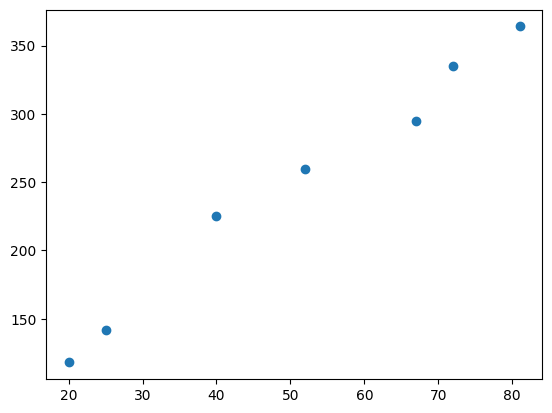

In [7]:
# Visualizando de forma gráfica essas informações
plt.scatter(base["Investimento em marketing"],base["Venda Qtd"])
plt.show()

# Traçando uma reta passando por esses pontos

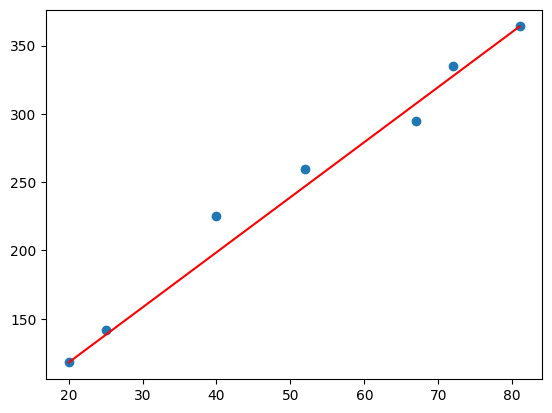

In [8]:
plt.scatter(base["Investimento em marketing"],base["Venda Qtd"])
x0 = base["Investimento em marketing"][0]
y0 = base["Venda Qtd"][0]
x1 = base["Investimento em marketing"][6]
y1 = base["Venda Qtd"][6]
plt.plot([x0,x1],[y0,y1],"r")
plt.show()

# Usando a equação da reta para determinar a venda
### y = ax + b

In [9]:
def EncontraY(x_reta,y_reta,x):
    a = (y_reta[1] - y_reta[0])/(x_reta[1] - x_reta[0])
    b = y_reta[1] - a*x_reta[1]
    y = a*x + b
    return y

In [10]:
EncontraY([x0,x1],[y0,y1],75)

339.8032786885246

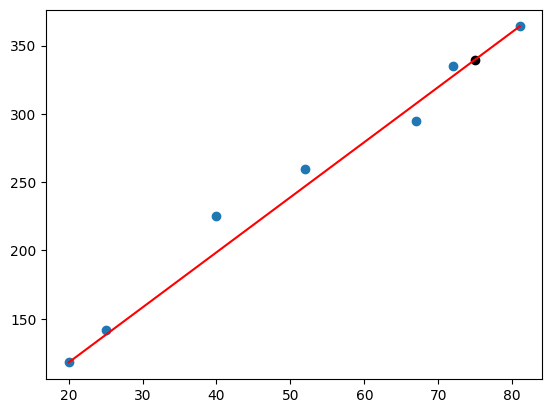

In [11]:
plt.scatter(base["Investimento em marketing"],base["Venda Qtd"])
plt.scatter(75,EncontraY([x0,x1],[y0,y1],75),color="k")
x0 = base["Investimento em marketing"][0]
y0 = base["Venda Qtd"][0]
x1 = base["Investimento em marketing"][6]
y1 = base["Venda Qtd"][6]
plt.plot([x0,x1],[y0,y1],"r")
plt.show()

# Descobrindo a venda usando Machine Learning

In [12]:
from sklearn import linear_model

In [13]:
reg = linear_model.LinearRegression()

In [14]:
reg.fit(base["Investimento em marketing"].values.reshape(-1, 1),base["Venda Qtd"])

LinearRegression()

In [15]:
reg.coef_

array([3.90643623])

In [16]:
reg.intercept_

49.200323514387804

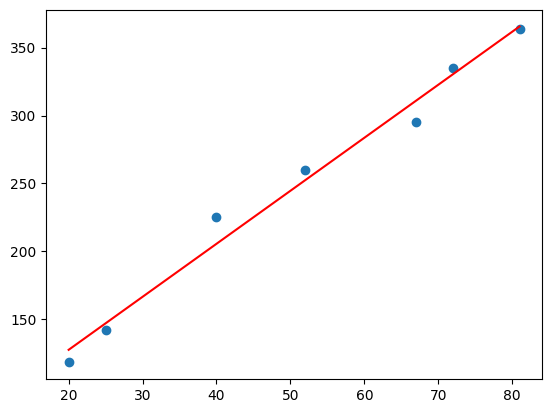

In [17]:
plt.scatter(base["Investimento em marketing"],base["Venda Qtd"])
x = np.array(base["Investimento em marketing"])
y = reg.intercept_ + x*reg.coef_
plt.plot(x,y,"r")
plt.show()

In [18]:
reg.predict([[75]])

array([342.18304104])

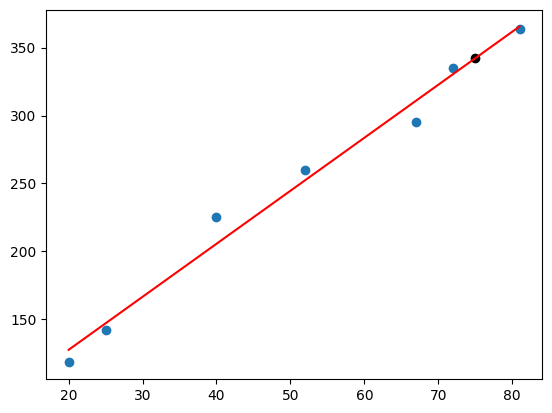

In [19]:
plt.scatter(base["Investimento em marketing"],base["Venda Qtd"])
plt.scatter(75,reg.predict([[75]])[0],color="k")
x = np.array(base["Investimento em marketing"])
y = reg.intercept_ + x*reg.coef_
plt.plot(x,y,"r")
plt.show()